<a href="https://colab.research.google.com/github/a1899943/Time_series_forcasting/blob/main/1899943__EnjianMai_assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2: Time Series Forecasting

### \<Enjian Mai> \<a1899943>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion


### 1. Read the dataset

In [ ]:
!pip install pmdarima
#from pmdarima.arima import auto_arima

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.metrics import mean_absolute_error, mean_squared_error
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('energydata_complete.csv')
df.info()#19735 rows data pre 10min collect 0.3year may not cotain the season impact but maybe time in a day
df.head()#from jan 11 to MAy 27 morning noon evening show period of valuable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

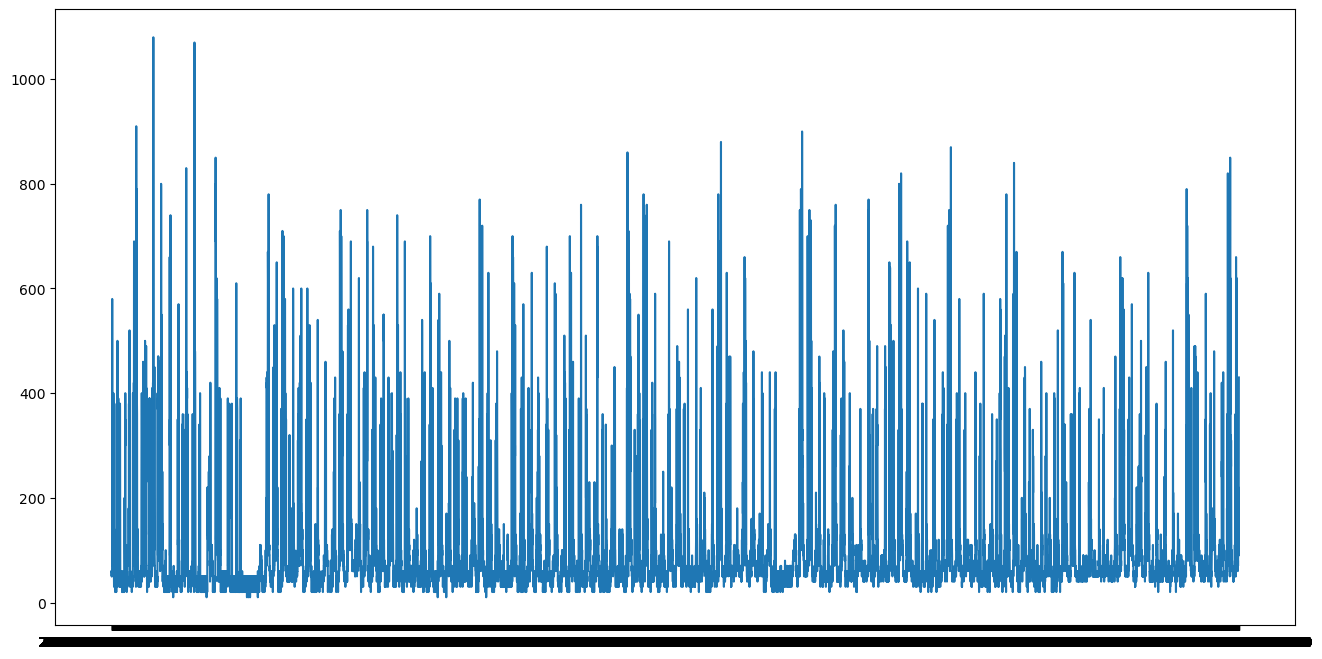

In [ ]:
#setting index as date

df.index = df['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Appliances'], label='Appliances')


### 3. Implement prediction models

In [41]:
df.isnull().sum()
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'Appliances'])
for i in range(0,len(df)):
     new_data.loc[i,"date"] = df.loc[i,"date"]
     new_data.loc[i,'Appliances'] = df.loc[i,'Appliances']
split=int(len(new_data)*0.66)
train,test=new_data.iloc[:split],new_data.iloc[split:]
trainX,testX,trainY,testY=train['date'],test['date'],train['Appliances'],test['Appliances']
season_length = 6*24#pre_day as a season
print(test.shape)



(6710, 2)


### 4. Train prediction models

In [ ]:
#model_AR = auto_arima(trainY, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
#model_AR.fit(trainY)
#forecast = model_AR.predict(n_periods=248)
#forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])








In [43]:
# use  i-season_leagth to replace the date i
y=df['Appliances']
y_pred_seasonal_naive = testY.copy()
print(y_pred_seasonal_naive.shape)
for i in range(len(testY)):
    idx = split + i
    y_pred_seasonal_naive.iloc[i] = y[idx - season_length]
#print(y_pred_seasonal_naive.shape,testY.shape)
#print(y_pred_seasonal_naive)
#print(testY)
rmse1 = mean_squared_error(testY, y_pred_seasonal_naive)
#print(rmse1)

(6710,)
(6710,) (6710,)
13025     50
13026     50
13027     60
13028     40
13029     40
        ... 
19730    600
19731    520
19732    290
19733    250
19734    190
Name: Appliances, Length: 6710, dtype: object
13025     60
13026     60
13027     60
13028     50
13029     50
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 6710, dtype: object
12912.20566318927


### 5. Test predictin models and show results

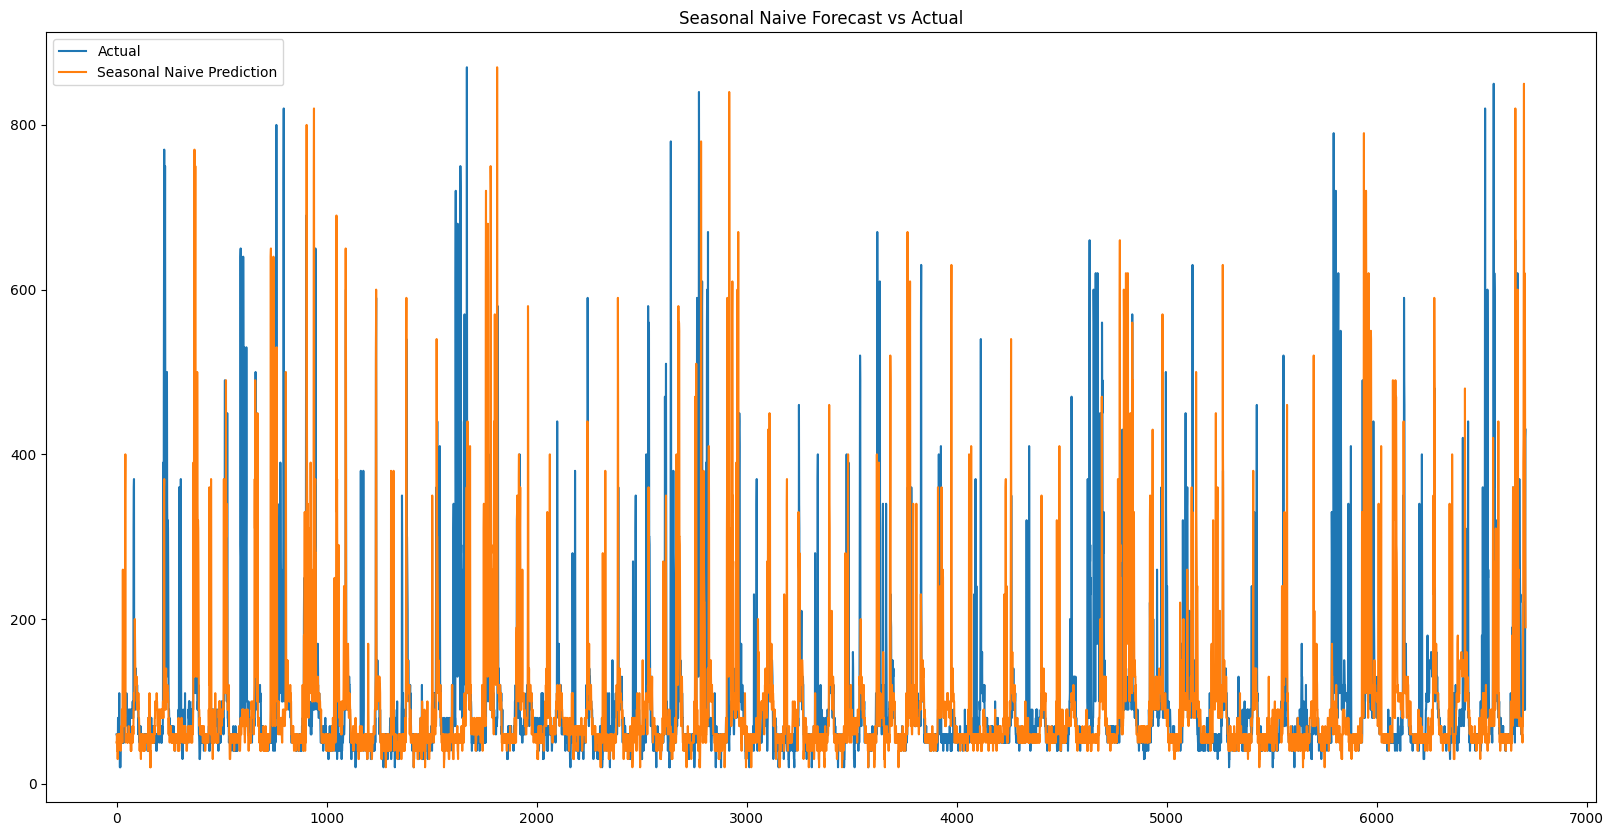

In [20]:

plt.plot(testY.values, label='Actual')
plt.plot(y_pred_seasonal_naive.values, label='Seasonal Naive Prediction')
plt.legend()
plt.title("Seasonal Naive Forecast vs Actual")
plt.show()


In [18]:
#LSTM
print(y)
scaler = MinMaxScaler(feature_range=(0, 1))
ydf=pd.DataFrame(y)
scaled_data = scaler.fit_transform(ydf)
x_train, y_train = [], []
for i in range(60,len(trainY)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model_LS = Sequential()
model_LS.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model_LS.add(LSTM(units=50))
model_LS.add(Dense(1))

model_LS.compile(loss='mean_squared_error', optimizer='adam')
model_LS.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = y[len(y) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Appliances = model_LS.predict(X_test)
Appliances = scaler.inverse_transform(Appliances)



0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12965/12965 - 329s - 25ms/step - loss: 0.0046


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


[[ 43.380222]
 [ 51.88104 ]
 [ 50.30382 ]
 ...
 [ 92.487854]
 [240.9313  ]
 [299.4341  ]]
0        60
1        60
2        50
3        50
4        60
         ..
13020    50
13021    50
13022    50
13023    50
13024    50
Name: Appliances, Length: 13025, dtype: object


<ipython-input-33-3a29cfcd09cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = Appliances


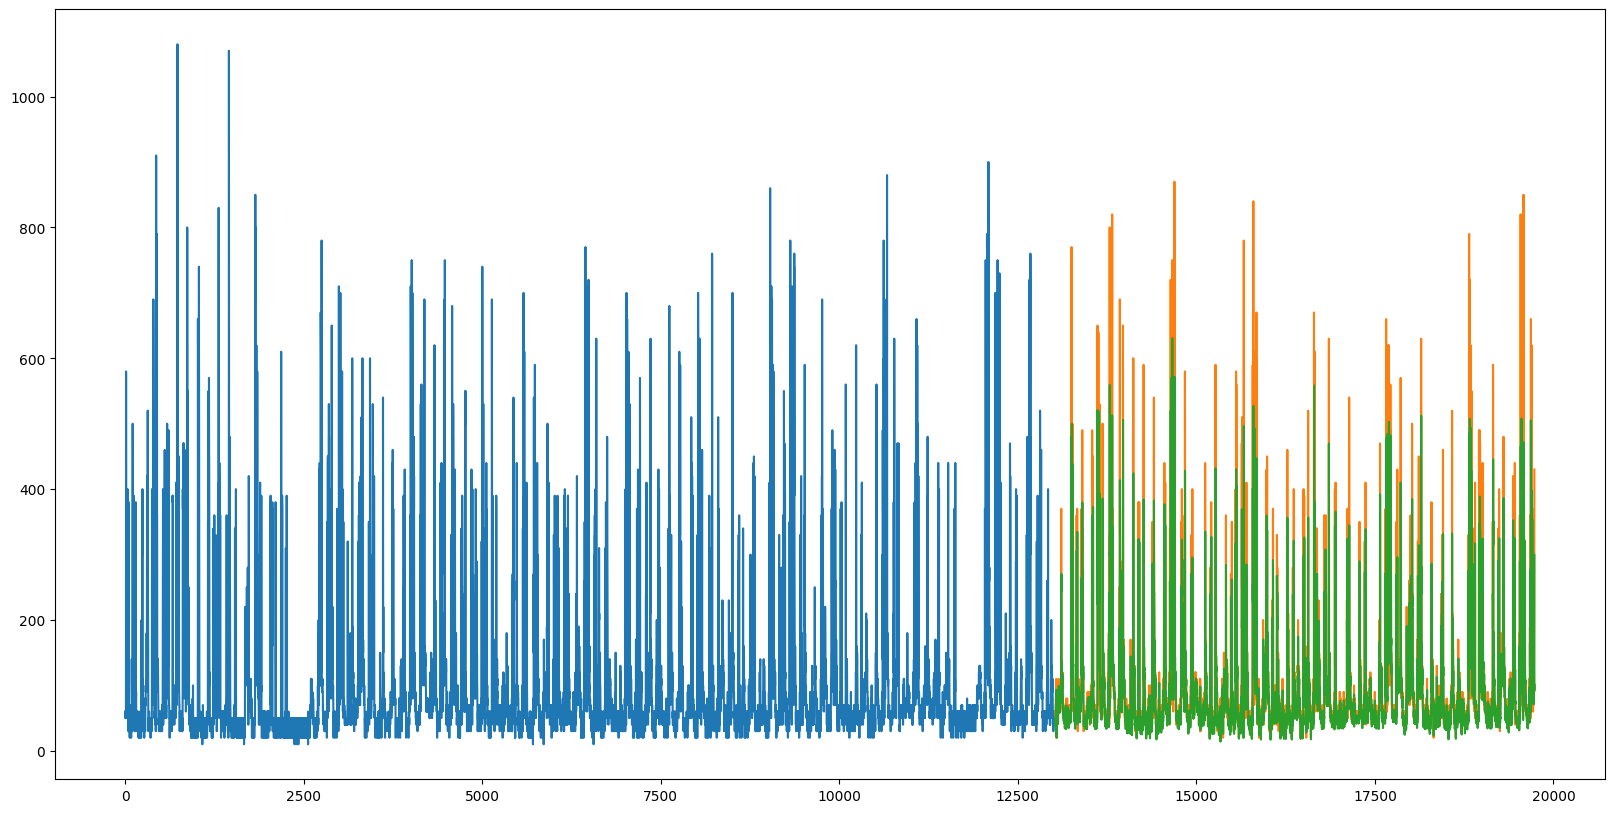

In [33]:
print (Appliances)
print(trainY)
train = new_data[:split]
valid = new_data[split:]
valid['Predictions'] = Appliances
plt.plot(train['Appliances'])
plt.plot(valid[['Appliances','Predictions']])

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

In [45]:
'''
rmse_ = mean_squared_error(y_test, y_pred_seasonal_naive, squared=False)

print("Seasonal Naive Method MAE:", mae)
print("Seasonal Naive Method RMSE:", rmse)'''
rmse1 = mean_squared_error(testY, y_pred_seasonal_naive)
rmse2 = mean_squared_error(testY,Appliances )
print("Seasonal Naive Method RMSE:", rmse1)
print("LSTM Method RMSE:", rmse2)

Seasonal Naive Method RMSE: 12912.20566318927
LSTM Method RMSE: 3775.43603515625


### 7. Reflect on what you have learned by completing this assignment

In [ ]:
#I want to try ARIMA, but in vscode fit the model spend too much time (out of 30 mins and finally my window system break down) and in online IDE colab I can not import #from pmdarima.arima import auto_arima,so finnally I try the differnent medthod

### 8. References

In [ ]:
# the workshop document Time_series_forcasting.ipynb